<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/lecturadedatosabiertoscmszmumu-MPM-cvr/blob/main/CMSOpenDataZtoMuMu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#panda nos permite manipular el archivo csv https://pandas.pydata.org
import pandas as pd
#numpy nos permite hacer operaciones usando vectores https://numpy.org
import numpy as np
#plotly nos permite crear graficas interactivas https://plotly.com/python/
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt


%matplotlib inline
#usamos la liga que está directamente en la página.
particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')
particles



,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,173692,1245050481,8.9721,-1.6158,-2.7176,1,-0.0294,8.7183,13.5266,1.8709,2.7911,1,-0.0689,0.4202
9996,173692,1244979327,39.4543,-1.1310,-2.0568,1,0.0417,0.0000,47.7209,-0.1834,1.7965,-1,-0.0794,0.0000
9997,173692,1245305163,40.6034,-1.5051,-1.6758,-1,0.0635,0.2012,44.4382,-1.0010,1.5380,1,-0.0671,1.1499
9998,173692,1245041468,37.2853,1.0024,-2.1486,1,0.0361,0.0000,41.0945,-0.1200,0.8850,-1,-0.0291,0.0000


In [ ]:
fig_5 = px.histogram(
    particles,
    x='pt2',
    nbins=10000,
    title='Histograma momento transversal 2',
    labels={'pt2': 'Momento transversal pt2 [GeV/c]', 'count': 'Frecuencia'},
    opacity=0.75,
    color_discrete_sequence=['#636EFA']
)

fig_5.update_layout(
    xaxis_title='pt2 [GeV/c]',
    yaxis_title='Frecuencia',
    font=dict(family='Arial', size=14),
    title_font=dict(size=18, family='Arial', color='darkblue')
)

fig_5.show()

In [ ]:
fig_5 = px.histogram(
    particles,
    x='pt1',
    nbins=10000,  # Controla el número de barras
    title='Histograma momento transversal 1',
    labels={'pt1': 'Momento transversal pt1 [GeV/c]', 'count': 'Frecuencia'},
    opacity=0.75,  # Transparencia para visual más agradable
    color_discrete_sequence=['#636EFA']  # Color azul predeterminado, personalizable
)

fig_5.update_layout(
    xaxis_title='pt1 [GeV/c]',
    yaxis_title='Frecuencia',
    font=dict(family='Arial', size=14),
    title_font=dict(size=18, family='Arial', color='darkblue')
)

fig_5.show()

In [ ]:
# Cuenta cada valor de Q1 y Q2 por separado
q1 = particles["Q1"].value_counts().sort_index() # Series: índice = carga, valor = frecuencia
q2 = particles["Q2"].value_counts().sort_index()

#  Organiza en una tabla ordenada (-1 primero, luego +1)
charges = [-1, 1] # orden explícito
table = pd.DataFrame({
    "Charge": charges,
    "Q1_count": [q1.get(c, 0) for c in charges],
    "Q2_count": [q2.get(c, 0) for c in charges],
})

# Muestra la tabla
print(table.to_string(index=False))

 Charge  Q1_count  Q2_count
     -1      5156      4808
      1      4844      5192


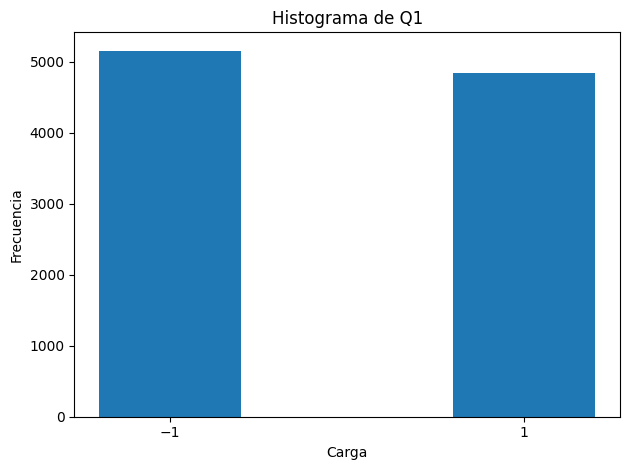

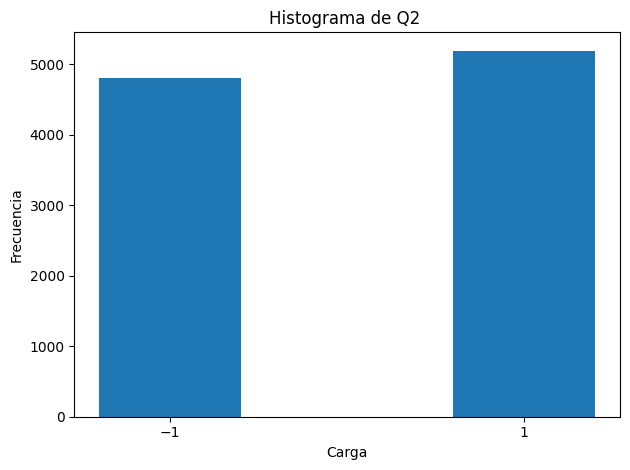

In [ ]:
from pathlib import Path



charges = [-1, 1]
q1_counts = particles["Q1"].value_counts().reindex(charges, fill_value=0)
q2_counts = particles["Q2"].value_counts().reindex(charges, fill_value=0)

# Histograma para Q1
plt.figure()
plt.bar(charges, q1_counts)
plt.xticks(charges)
plt.xlabel("Carga")
plt.ylabel("Frecuencia")
plt.title("Histograma de Q1")
plt.tight_layout()
plt.show()
color_discrete_sequence=['#636EFA']

# Histograma para Q2
plt.figure()
plt.bar(charges, q2_counts)
plt.xticks(charges)
plt.xlabel("Carga")
plt.ylabel("Frecuencia")
plt.title("Histograma de Q2 ")
plt.tight_layout()
plt.show()

In [39]:
df=particles
df['QT'] = particles['Q1'] + particles['Q2']
df2=particles
df2["numero"]=range(1,len(df2)+1)

table2=df[["numero","Run","Event","Q1","Q2","QT"]]
print(table2.to_string(index=False))

 numero    Run      Event  Q1  Q2  QT
      1 165617   74969122   1  -1   0
      2 165617   75138253  -1   1   0
      3 165617   75887636  -1   1   0
      4 165617   75779415   1  -1   0
      5 165617   75098104   1  -1   0
      6 165617   77255513  -1   1   0
      7 165617   76042048  -1   1   0
      8 165617   76661162  -1   1   0
      9 165617   77076988   1  -1   0
     10 165617   77459740  -1   1   0
     11 165617   76405662  -1   1   0
     12 165617   76583723   1  -1   0
     13 165617   76179155   1  -1   0
     14 165617   75954345  -1   1   0
     15 165617   78956967   1  -1   0
     16 165617   77629816  -1   1   0
     17 165617   78897689   1  -1   0
     18 165617   78700766  -1   1   0
     19 165617   78348203   1  -1   0
     20 165617   78693707   1   1   2
     21 165617   78814907  -1   1   0
     22 165617   78974110   1  -1   0
     23 165617   80578768  -1   1   0
     24 165617   80284893  -1   1   0
     25 165617   80456027   1  -1   0
     26 1656

In [41]:
# Cuenta cada valor de Q1 y Q2 por separado
QT = df["QT"].value_counts().sort_index() # Series: índice = carga, valor = frecuencia

 #  Organiza en una tabla ordenada
charges2 = [0, 2, -2] # orden explícito
table3 = pd.DataFrame({
    "Value": charges2,
    "QT_count": [QT.get(c, 0) for c in charges2],

})

# Muestra la tabla
print(table3.to_string(index=False))

 Value  QT_count
     0      9664
     2       186
    -2       150
